In [1]:
import pandas as pd
import numpy as np
import datetime
from sim import generate_simulation
from model_cancellations import get_otb_res, predict_cancellations

pd.options.display.max_rows = 60
pd.options.display.max_columns = 70

In [2]:
h1_capacity = 187
h2_capacity = 226
AOD = "2017-08-01"
AOD_dt = pd.to_datetime(AOD)

h1_res = pd.read_pickle("pickle/h1_res.pick")
h2_res = pd.read_pickle("pickle/h2_res.pick")
h1_dbd = pd.read_pickle("pickle/h1_dbd.pick")
h2_dbd = pd.read_pickle("pickle/h2_dbd.pick")
# h1_sim = pd.read_pickle("pickle/h1_sim.pick")
# h2_sim = pd.read_pickle("pickle/h2_sim.pick")

Split complete.
Training sample size: 38016
Testing sample Size: 1765




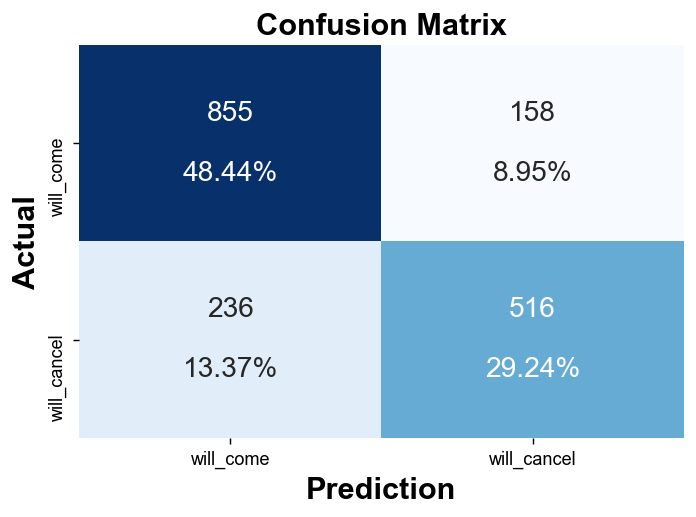

Optimal probability threshold (to maximize F-0.5): 0.648
F-0.5 Score: 0.748



In [3]:
h1_otb = predict_cancellations(h1_res, AOD, 1, print_len=True)

In [4]:
h1_otb

,ResNum,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate,LOS,CheckoutDate,...,ResMadeDate,NumPeople,CT_is_grp,CT_is_trn,CT_is_trnP,RS_No-Show,MS_Corporate,MS_Direct,MS_Groups,MS_Offline TA/TO,MS_Online TA,DC_Direct,DC_TA/TO,DC_Undefined,MEAL_FB,MEAL_HB,MEAL_SC,MEAL_Undefined,FROM_PRT,FROM_GBR,FROM_ESP,FROM_IRL,FROM_FRA,FROM_DEU,FROM_CN,FROM_NLD,FROM_USA,FROM_ITA,FROM_other,DT_NonRefundable,DT_Refundable,AgencyBooking,CompanyListed,DaysUntilArrival,will_cancel
0,0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,0,2015-07-01,...,2014-07-24,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,0,0,False,False,762,NaN
1,1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,0,2015-07-01,...,2013-06-24,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,0,0,False,False,762,NaN
2,2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,2015-07-02,...,2015-06-24,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,0,0,False,False,762,NaN
3,3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,2015-07-02,...,2015-06-18,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,0,0,True,False,762,NaN
4,4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,2,2015-07-03,...,2015-06-17,2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,0,0,True,False,762,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,40055,0,212,2017,August,35,31,2,8,2,1,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,143,NaN,0,Transient,89.75,0,0,Check-Out,2017-09-10,2017-08-31,10,2017-09-10,...,2017-01-31,3,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,0,0,True,False,-30,False
40056,40056,0,169,2017,August,35,30,2,9,2,0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250,NaN,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10,2017-08-30,11,2017-09-10,...,2017-03-14,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,False,False,False,True,False,False,False,False,False,False,False,0,0,True,False,-29,False
40057,40057,0,204,2017,August,35,29,4,10,2,0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250,NaN,0,Transient,153.57,0,3,Check-Out,2017-09-12,2017-08-29,14,2017-09-12,...,2017-02-06,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,False,False,False,True,False,False,False,False,False,False,False,0,0,True,False,-28,False
40058,40058,0,211,2017,August,35,31,4,10,2,0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40,NaN,0,Contract,112.80,0,1,Check-Out,2017-09-14,2017-08-31,14,2017-09-14,...,2017-02-01,2,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,False,True,False,False,False,False,False,False,False,False,False,0,0,True,False,-30,False


In [5]:
otb_mask = (
    (h1_otb.ResMadeDate <= AOD)  # reservations made before AOD
    & (h1_otb.ArrivalDate <= AOD)  # arriving before/on AOD
    & (h1_otb.CheckoutDate > AOD)  # checking out after AOD
) & (
    (h1_otb.IsCanceled == 0)
    | (
        (  # only include cxls that have not been canceled yet
            (h1_otb.IsCanceled == 1) & (h1_otb.ReservationStatusDate >= AOD)
        )
    )
)

In [6]:
h1_otb = h1_otb[otb_mask]

In [7]:
h1_otb.will_cancel.value_counts()

False    164
True      20
Name: will_cancel, dtype: int64

In [8]:
mask = (h1_res.IsCanceled == 1) 
h1_res[mask].CheckoutDate

8       2015-07-04
9       2015-07-04
10      2015-07-05
27      2015-07-08
32      2015-07-11
           ...    
32682   2017-03-21
32684   2017-03-21
32835   2017-02-08
34707   2017-08-25
36837   2017-06-06
Name: CheckoutDate, Length: 11122, dtype: datetime64[ns]

In [9]:
mask = (h1_res["ReservationStatus"] != 'Canceled')
h1_res[mask].ReservationStatus.value_counts()

Check-Out    28938
No-Show        291
Name: ReservationStatus, dtype: int64

In [10]:
h1_otb = get_otb_res(h1_res, '2017-08-02')
h1_otb.IsCanceled.value_counts()

0    992
1     80
Name: IsCanceled, dtype: int64

Preparing crystal ball...
Predicting future cancellations...
Split complete.
Training sample size: 38016
Testing sample Size: 1765




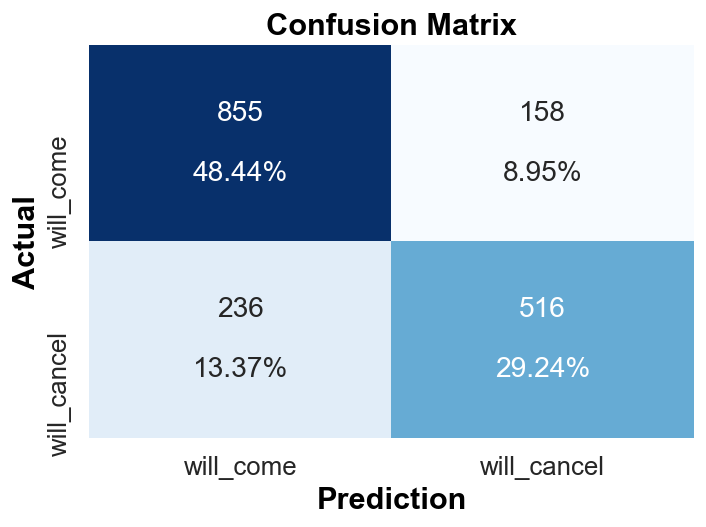

Optimal probability threshold (to maximize F-0.5): 0.648
F-0.5 Score: 0.748

Training 31 models to obtain STLY statistics...

Predicting cancellations for STLY date 2016-08-02...
Predicting cancellations for STLY date 2016-08-03...
Predicting cancellations for STLY date 2016-08-04...
Predicting cancellations for STLY date 2016-08-05...
Predicting cancellations for STLY date 2016-08-06...
Predicting cancellations for STLY date 2016-08-07...
Predicting cancellations for STLY date 2016-08-08...


In [ ]:
h1_sim = generate_simulation(h1_dbd, AOD, 1, h1_res)

In [ ]:
h1_sim.head(15)

In [ ]:
h2_sim = generate_simulation(h2_dbd, AOD, 2, h2_res)

In [ ]:
h2_sim.head(15)

In [ ]:
h1_sim.loc["2017-08-02"]

In [ ]:
h1_dbd.loc["2017-08-02"]

In [ ]:
h1_dbd.loc['2016-08-03']

In [ ]:
h1_res.columns

In [ ]:
h1_res.ReservationStatus.value_counts()

In [ ]:
h2_sim.head()

In [ ]:
h1_sim.loc["2017-08-15", ["RoomsOTB", "STLY_OTB", "LYA_RoomsSold"]]

In [ ]:
h1_dbd.loc["2017-08-15", ["RoomsSold", "ADR", "RoomRev", "RevPAR", "NumCancels"]]

In [ ]:
h1_dbd.loc["2016-08-16", ["RoomsSold", "ADR", "RoomRev", "RevPAR", "NumCancels"]]

In [ ]:
as_of_date="2017-08-16"
h1_res['ReservationStatusDate'] = pd.to_datetime(h1_res.ReservationStatusDate)
otb_mask = (
        (h1_res.ResMadeDate <= as_of_date)  # reservations made before AOD
        & (h1_res.ArrivalDate <= as_of_date)  # arriving before/on AOD
        & (h1_res.CheckoutDate > as_of_date)  # checking out after AOD
    ) & (
            (h1_res.IsCanceled == 0)
            | (
                (  # only include cxls that have not been canceled yet
                    (h1_res.IsCanceled == 1)
                    & (h1_res.ReservationStatusDate >= as_of_date)
                )
            )
    )
h1_res_aod = h1_res[otb_mask][['IsCanceled', 'ArrivalDate', 'CheckoutDate', 'ResMadeDate', 'LOS', 'ReservationStatusDate']]
h1_res_aod.sort_values('ReservationStatusDate', ascending=False, inplace=True)
h1_res_aod.shape


In [ ]:
# h1_sim.to_pickle("pickle/h1_sim.pick")
# h2_sim.to_pickle("pickle/h2_sim.pick")